# Cloning the Repo

In [ ]:
#@title Cloning the AnimeGAN repo
!git clone https://github.com/ShilpaShivarudraiah/AnimeGAN-Pytorch.git

fatal: destination path 'AnimeGAN-Pytorch' already exists and is not an empty directory.


In [ ]:
cd /content/AnimeGAN-Pytorch

/content/AnimeGAN-Pytorch


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Cloning the pytorch-fid repo
!git clone https://github.com/ShilpaShivarudraiah/pytorch_fid.git

fatal: destination path 'pytorch_fid' already exists and is not an empty directory.


In [ ]:
import sys
sys.path.append('/content/AnimeGAN-Pytorch/pytorch_fid/src/pytorch_fid')
from fid_score import fid

# Inferencing a single image

Saving 1.jpg to 1.jpg


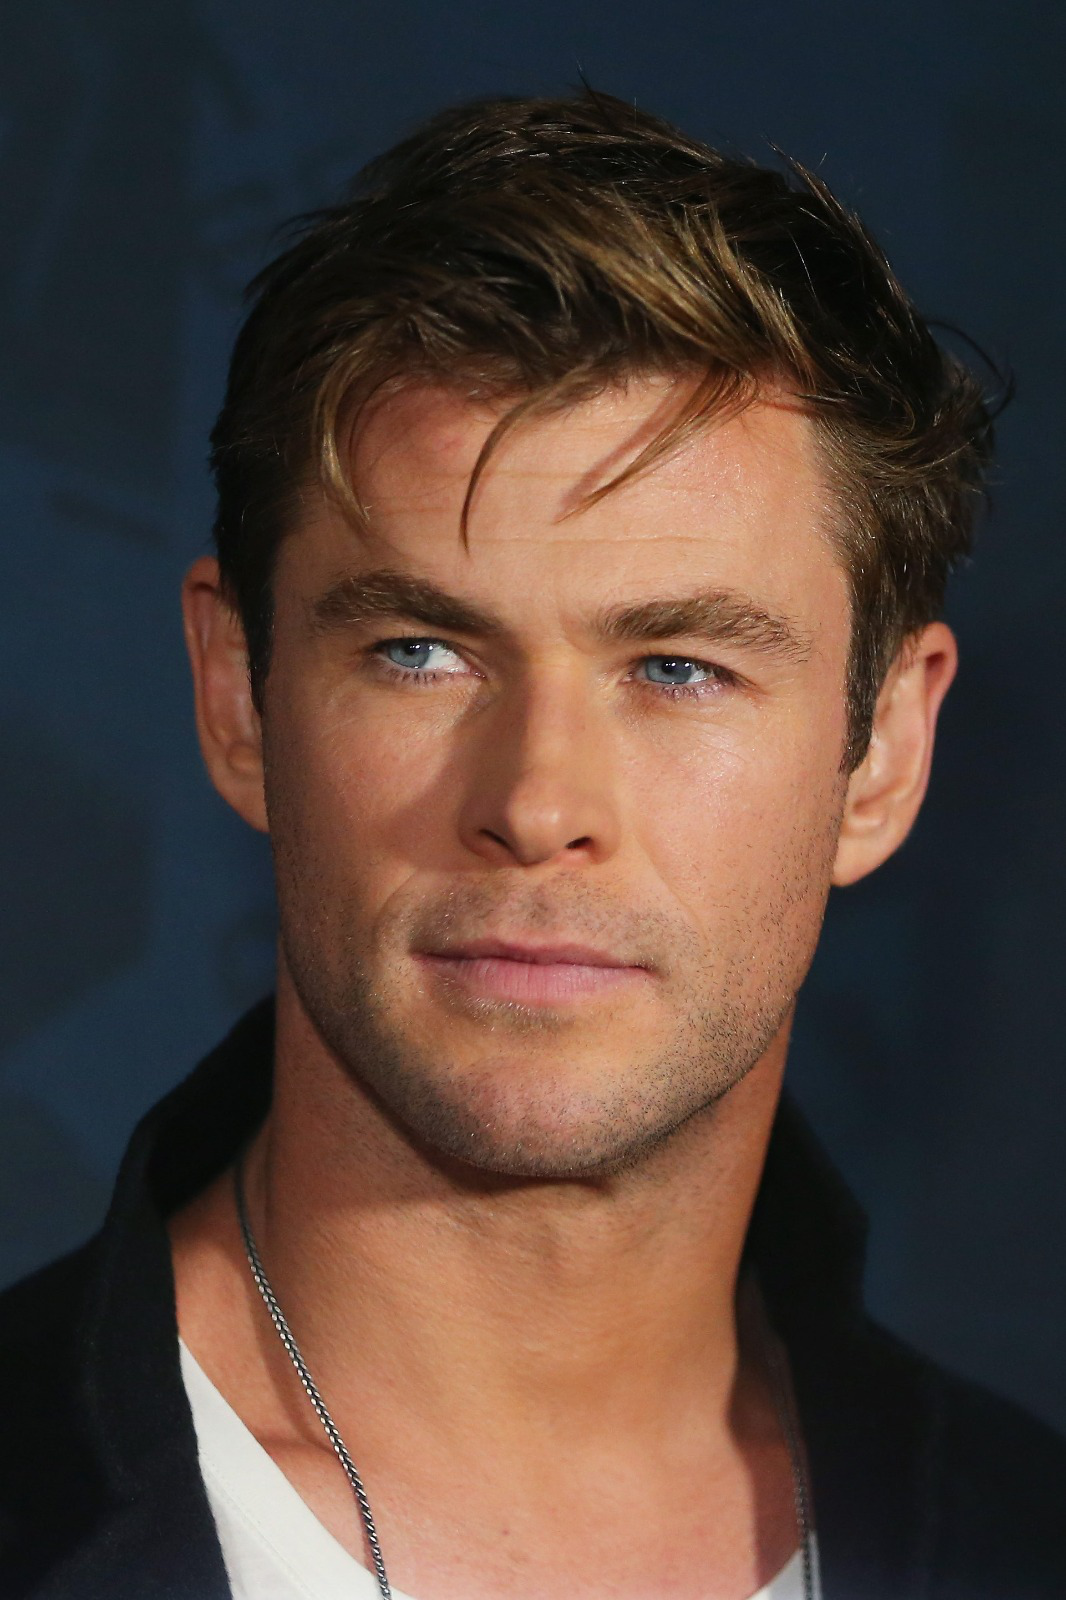

In [ ]:
#@title Upload
from google.colab import files
from PIL import Image
import io
import os
uploaded = files.upload()
image = Image.open(io.BytesIO(list(uploaded.values())[0]))
if not os.path.exists('/content/input'):
  os.makedirs('/content/input')
if not os.path.exists('/content/output'):
  os.makedirs('/content/output')
image.save('/content/input/image.png')
image

## Inferencing

In [ ]:
#Make sure to replace shinkai_pre_trained with pretrained-checkpoint-shinkai-freezed
!python3 inference_image.py --checkpoint '/content/drive/MyDrive/shinkai_pre_trained/generator_Shinkai.pth' \
                        --src '/content/input/image.png' \
                        --dest '/content/output/res.png'

Weight loaded, ready to predict
Anime image saved to /content/output/res.png


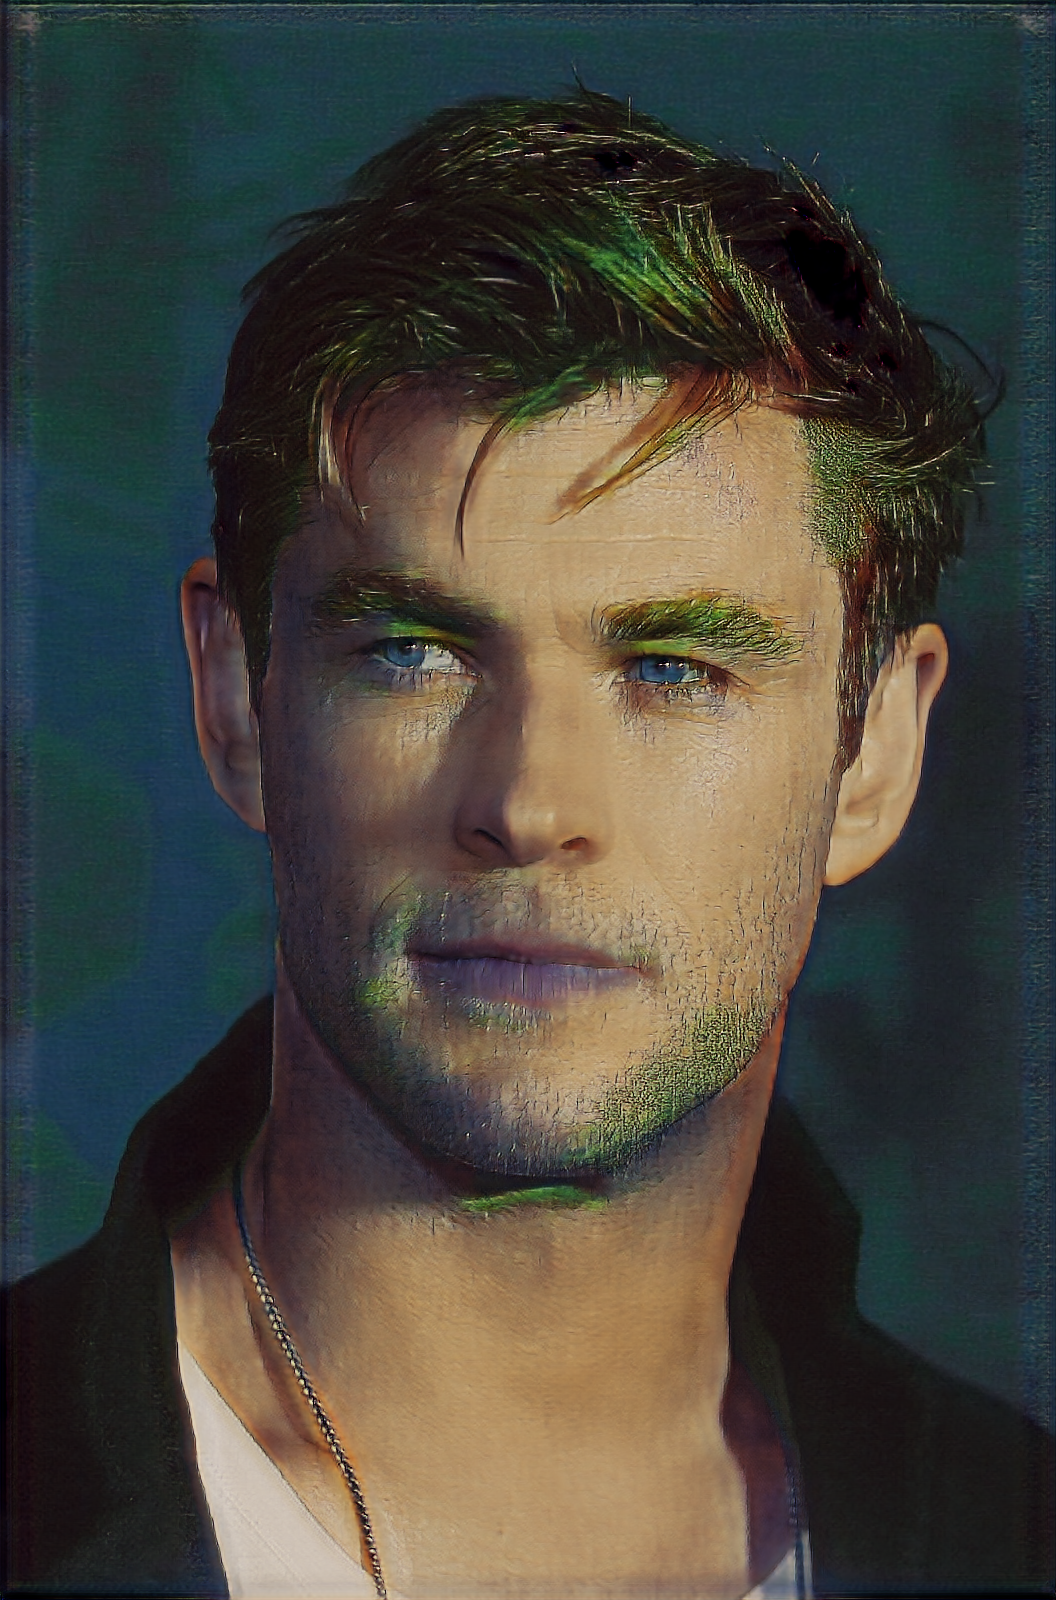

In [ ]:
#@title Visualizing the Generated Image
img = Image.open('/content/output/res.png')
img

## Doing the Evaluation

In [ ]:
path = ['/content/input','/content/output']
kk = fid()
# f.run_fid()

In [ ]:
kk.run_fid(path)

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 208MB/s]
100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

FID:  155.0807743154136


155.0807743154136

# Inferencing & Eval on Test Images

## Doing Inference for the Test Images

In [ ]:
#Make sure to replace shinkai_pre_trained with pretrained-checkpoint-shinkai-freezed

!python3 inference_image.py --checkpoint '/content/drive/MyDrive/shinkai_pre_trained/generator_Shinkai.pth' \
                        --src '/content/drive/MyDrive/Test_Images' \
                        --dest '/content/drive/MyDrive/Test_Images_Generated'

Weight loaded, ready to predict
Found 5 images in /content/drive/MyDrive/Test_Images
100% 5/5 [00:01<00:00,  3.87it/s]


## Doing Evaluation

In [ ]:
import os
import shutil

kk = fid()
input_path = '/content/drive/MyDrive/Test_Images'
output_path = '/content/drive/MyDrive/Test_Images_Generated'
input_1_path = '/content/input_1'
output_1_path = '/content/output_1'

total_sum = 0
number = 0

for image in os.listdir(input_path):
  print(image)

  # create input_1 and output_1 directories
  os.makedirs(input_1_path, exist_ok=True)
  os.makedirs(output_1_path, exist_ok=True)

  path_1 = os.path.join(input_path, image)
  path_2 = os.path.join(output_path, image.split('.')[0] + '_anime.jpg')
  
  
  # copy images to input_1 and output_1
  shutil.copy(path_1, os.path.join(input_1_path, image))
  shutil.copy(path_2, os.path.join(output_1_path, image.split('.')[0] + '_anime.jpg'))

  path = [input_1_path, output_1_path]

  # calculate FID
  fid = kk.run_fid(path)
  total_sum+=fid
  number+=1
  # remove input_1 and output_1 directories
  shutil.rmtree(input_1_path)
  shutil.rmtree(output_1_path)


000007.jpg


Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:03<00:00, 29.8MB/s]
100%|██████████| 1/1 [00:00<00:00,  6.81it/s]


FID:  187.4359016897743
000015.jpg


100%|██████████| 1/1 [00:00<00:00,  7.07it/s]


FID:  147.10397300395599
000006.jpg


100%|██████████| 1/1 [00:00<00:00,  4.24it/s]


FID:  212.6492407116461
000001.jpg


100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


FID:  201.03321249202443
000042.jpg


100%|██████████| 1/1 [00:00<00:00,  6.94it/s]

FID:  210.36111496416564


In [ ]:
print("Total Sum of FID",total_sum)
print("Mean FID",total_sum/number)

Total Sum of FID 958.5834428615665
Mean FID 191.7166885723133
